<a href="https://colab.research.google.com/github/VitorMansk/Projeto-Streaming/blob/main/RID1234_Desafio06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math as mt

#Data Understanding

In [ ]:
streaming = pd.read_csv("/content/streaming_data.csv")
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
streaming.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


#Data Preparation

In [ ]:
streaming = streaming.dropna(subset=["Age", "Subscription_type", "Gender"])
streaming.head()


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,NaN,1,NaN,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
for columns in ['Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating', "Churned"]:
  streaming[columns] = streaming[columns].fillna(0)

streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
streaming['Churned'] = streaming['Churned'].replace({1:'Yes', 0:'No'})
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
streaming.dtypes

,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,object
User_id,object


In [ ]:
for column in ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']:
    streaming[column] = streaming[column].astype(int)

streaming.dtypes

,0
Age,int64
Gender,object
Time_on_platform,int64
Devices_connected,int64
Subscription_type,object
Num_streaming_services,int64
Num_active_profiles,int64
Avg_rating,int64
Churned,object
User_id,object


#Modelagem dos Dados - Regressão Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
cat_vars = ["Gender", "Subscription_type"]
num_vars = ["Age", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Num_active_profiles", "Avg_rating" ]
modeling_vars = cat_vars + num_vars

In [ ]:
x = streaming.filter(modeling_vars).copy()
y = streaming["Churned"].copy()

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = model.predict(x_test)

In [ ]:
x_test["prediction"] = predict

y_test = pd.DataFrame(y_test)

x_test["real"] = y_test["Churned"]
x_test.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,prediction,real
41584,23,912,0,0,3,0,True,False,True,False,False,No,No
46201,60,7029,1,0,2,4,True,False,False,True,False,No,No
46884,64,1023,2,0,2,1,True,False,False,False,True,No,No
66791,27,4481,0,0,2,3,False,True,False,False,True,No,No
17213,33,1101,0,0,3,1,True,False,True,False,False,No,No


#Modelagem dos Dados - Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_vars = ["Gender", "Subscription_type"]
num_vars = ["Age", "Time_on_platform", "Devices_connected", "Num_streaming_services", "Num_active_profiles", "Avg_rating" ]
modeling_vars = cat_vars + num_vars

In [ ]:
x = streaming.filter(modeling_vars).copy()
y = streaming["Churned"].copy()

In [ ]:
le= LabelEncoder()

y = pd.DataFrame(streaming["Churned"])

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = LogisticRegression()

In [ ]:
lr = model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_test.assign(Churned = y_test).assign(label = lr.predict(x_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned,label
9750,43,7049,1,2,4,3,True,False,False,True,False,0,0
16358,45,3519,0,2,1,2,False,True,True,False,False,1,0
18046,57,5034,0,0,5,1,False,True,False,True,False,1,0
62263,41,0,0,3,4,2,True,False,False,True,False,0,0
53737,25,465,4,0,3,1,False,True,False,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,23,7333,4,0,3,0,True,False,True,False,False,1,0
74408,31,7403,2,0,1,1,False,True,False,True,False,0,0
75639,26,6173,2,0,1,0,False,True,False,True,False,0,0
52728,30,0,4,0,3,0,False,True,False,False,True,0,0


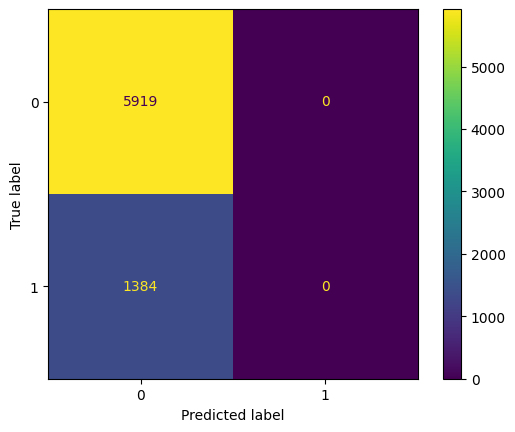

In [ ]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cmd.plot()

#Modelagem dos Dados - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
parameters = {'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [100,300,500]}

grid_search = GridSearchCV(rf, parameters, scoring="roc_auc", cv = 5, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

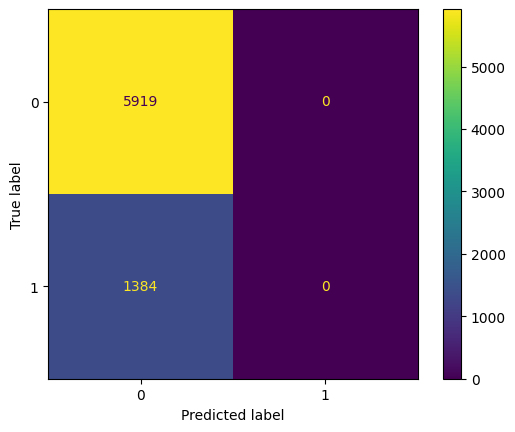

In [ ]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cmd.plot()